In [719]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import missingno as msno
from sklearn.preprocessing import StandardScaler

Importe las librerias y comense a ingestar los datos en formato cvs 

In [721]:
DF_test=pd.read_csv("./E-Commerce_test.csv", sep=';')

In [722]:
DF_train=pd.read_csv("./E-Commerce_train.csv", sep=';')

Observo el tipo de dato que tengo en cada columna

In [723]:
DF_test.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
dtype: object

In [724]:
DF_train.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

establesco a train como df para tratar con los datos de manera rapida

In [725]:
df=DF_train

observamos valores faltantes 

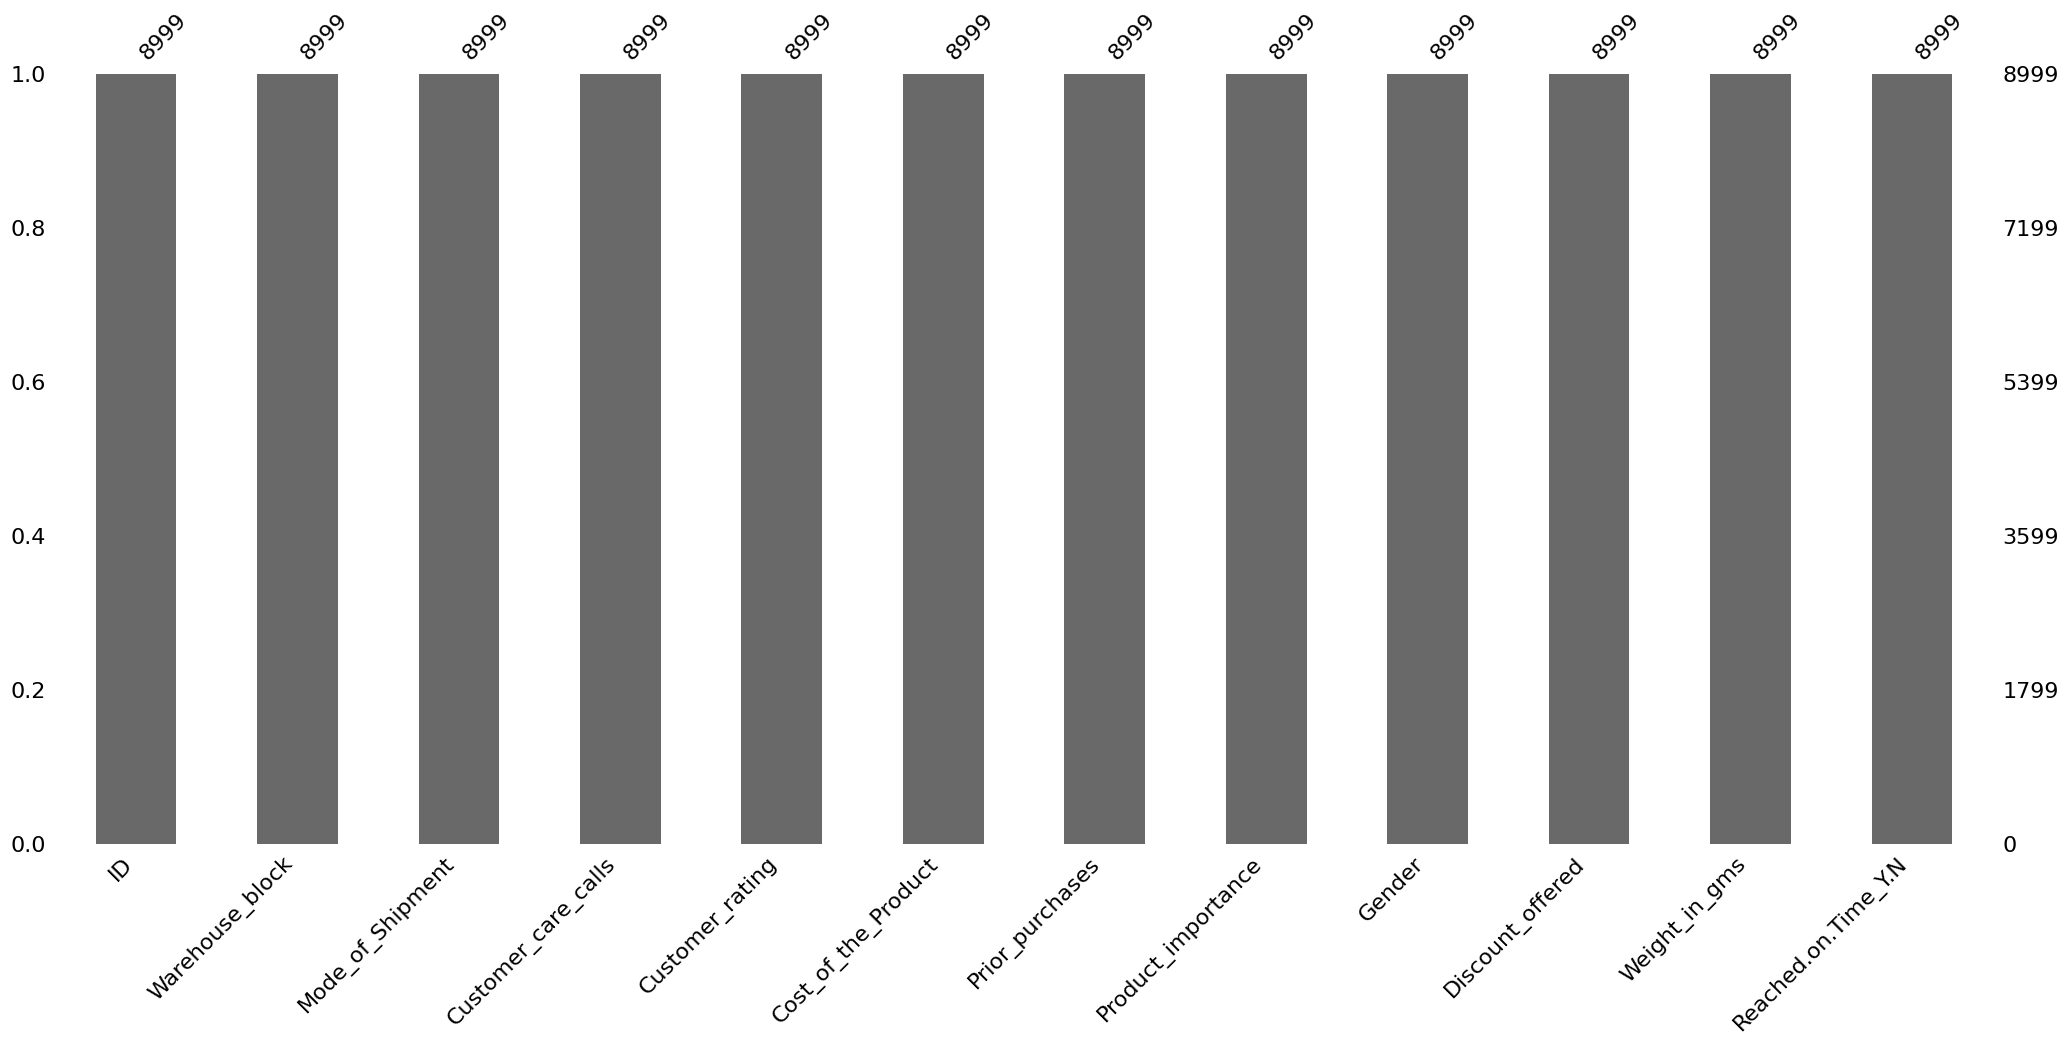

In [726]:
msno.bar(df)
plt.show()

In [727]:
DF_test.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [728]:
DF_test.tail(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210
1999,10999,D,Ship,2,5,155,5,low,F,6,1639


In [729]:
DF_train.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [730]:
DF_train.tail(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1
8998,8999,C,Ship,5,4,145,4,low,M,4,4790,0


renombro la columna Reached.on.Time_Y.N

In [731]:
df.rename(columns={'Reached.on.Time_Y.N':"shipping_status" }, inplace=True)

In [732]:
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,shipping_status
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


cambio los valores de 1 a si de 0 no con respeto al estado de envio, llego o no a tiempo .

In [733]:
df['shipping_status']=df['shipping_status'].replace({1:'Si',0:'No'})

dropeo la columna ID ya que no me aporta datos relevantes 

In [734]:
DF_test = DF_test.drop(['ID'], axis=1)

In [735]:
df = df.drop(['ID'], axis=1)

In [736]:
df_2=df

cuento los envios x si y x no

In [737]:
df_2['shipping_status'].value_counts()

Si    5719
No    3280
Name: shipping_status, dtype: int64

In [738]:
df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
shipping_status        object
dtype: object

observo con que forma me queda el dataframe

In [739]:
df_2.shape

(8999, 11)

creo un dataframe solo con las columnas con datos numericos

In [740]:


dfnum = df.drop(columns = ['Warehouse_block', 'Mode_of_Shipment',
                                  'Product_importance', 'Gender',
                                  'shipping_status'])

observo como se comportan las columnas

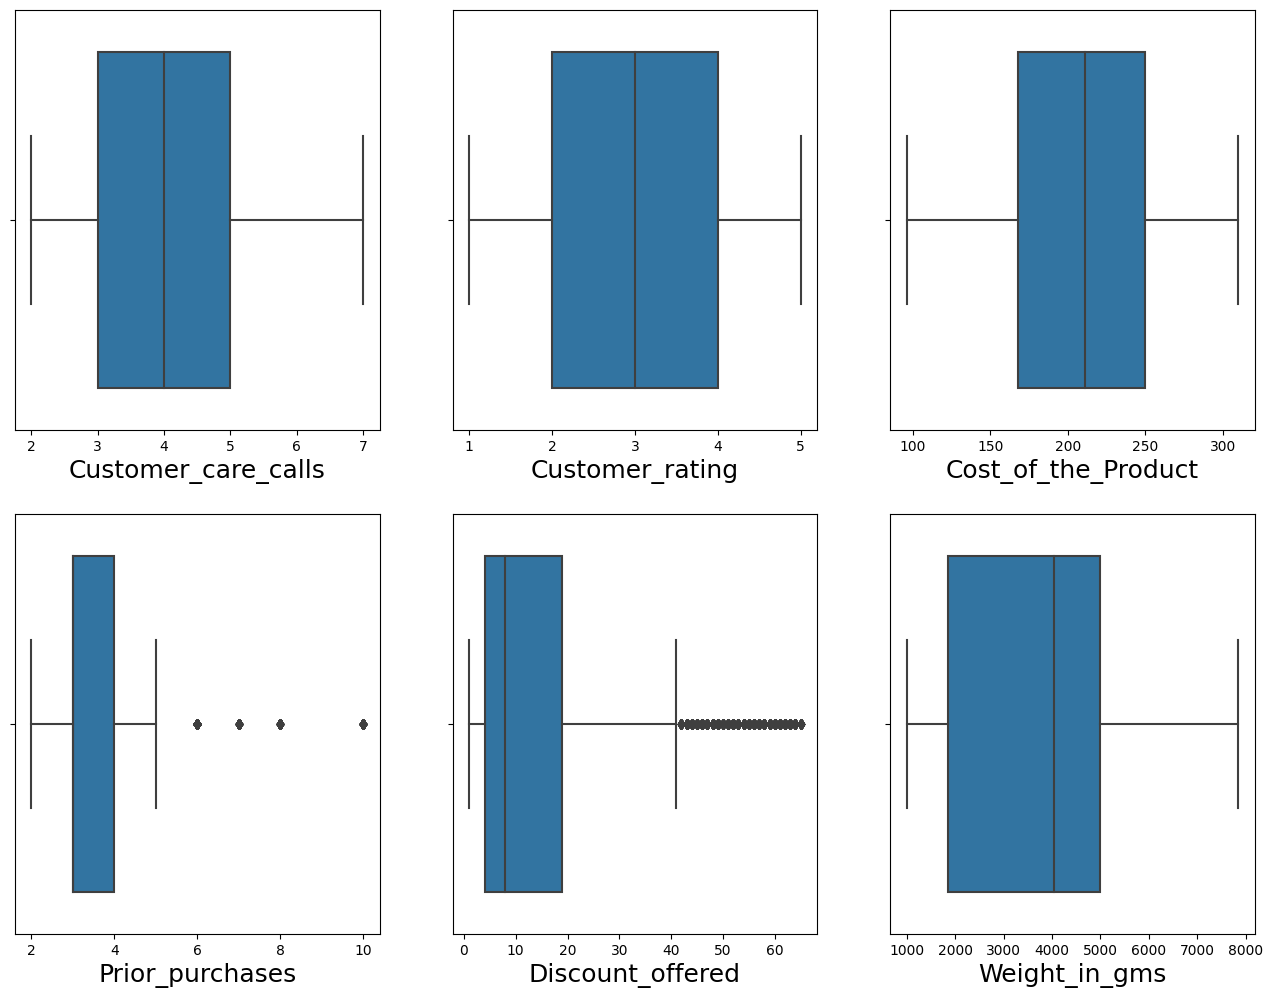

In [741]:
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(16, 12)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    boxdetails = sns.boxplot(x = dfnum[variable], ax=subplot) 
    boxdetails.set_xlabel(variable, fontsize = 18)

vamos a ver el dataframe descripto

In [742]:
DF_test.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.00000
mean,4.231500,2.97050,217.555000,3.82000,5.61400,3857.42650
std,1.136465,1.41585,46.336276,1.45453,2.90469,1707.78448
min,2.000000,1.00000,96.000000,2.00000,1.00000,1003.00000
25%,3.000000,2.00000,179.750000,3.00000,3.00000,1773.75000
50%,4.000000,3.00000,226.000000,4.00000,6.00000,4536.00000
75%,5.000000,4.00000,255.000000,5.00000,8.00000,5241.25000
max,7.000000,5.00000,310.000000,10.00000,10.00000,6000.00000


In [743]:

df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Verificamos que hay inconsistencias. El area no puede ser menor a cero.

In [744]:
df_2.Discount_offered.min()

1

In [816]:
df_2['Prior_purchases'].min()

2

Utilizaremos la técnica del rango intercuartílico para eliminar outliers. En compras previas

In [814]:
q1 = df_2['Prior_purchases'].quantile(0.25)
q3 = df_2['Prior_purchases'].quantile(0.75)
IQR = q3-q1
BI = q1 - 1.5*IQR
BS = q3 + 1.5*IQR

In [817]:
print(q1)
print(q3)
print(IQR)
print(BI)
print(BS)

3.0
4.0
1.0
1.5
5.5


In [818]:
print('Cantidad de registros totales:', df.shape[0])
print('Cantidad de outliers:', df[(df['Prior_purchases']<2) | (df['Prior_purchases']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 798


In [819]:
df_2.loc[df_2['Prior_purchases'] > BS, 'Prior_purchases'] = BS


In [ ]:
Utilizaremos la técnica del rango intercuartílico para eliminar outliers. En descuentos 

In [745]:
q1 = df_2['Discount_offered'].quantile(0.25)
q3 = df_2['Discount_offered'].quantile(0.75)
IQR = q3-q1
BI = q1 - 1.5*IQR
BS = q3 + 1.5*IQR

In [815]:
print(q1)
print(q3)
print(IQR)
print(BI)
print(BS)

3.0
4.0
1.0
1.5
5.5


In [747]:
print('Cantidad de registros totales:', df.shape[0])
print('Cantidad de outliers:', df[(df['Discount_offered']<1) | (df['Discount_offered']>BS)].shape[0] )


Cantidad de registros totales: 8999
Cantidad de outliers: 1193


In [748]:
df_2.loc[df_2['Discount_offered'] > BS, 'Discount_offered'] = BS



Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente uanque hubo muchos autliers (podria ser un problema luego)

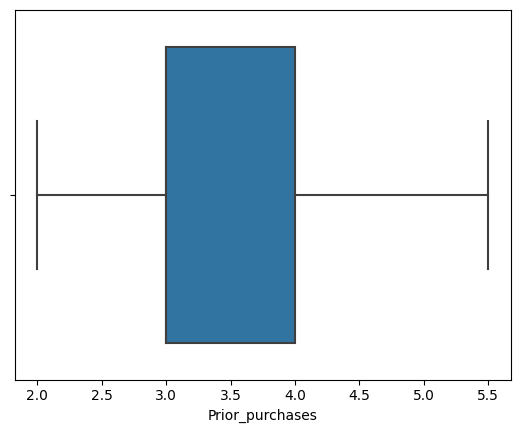

In [821]:
sns.boxplot(x = 'Prior_purchases', data = df_2)
plt.show()

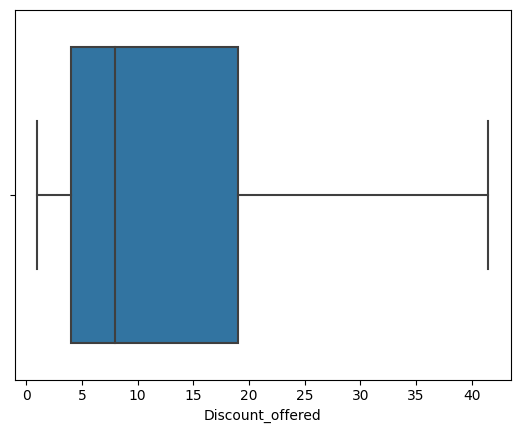

In [820]:
sns.boxplot(x = 'Discount_offered', data = df_2)
plt.show()

Trabajaremos con la variable Discount_offered. Veamos su distribución


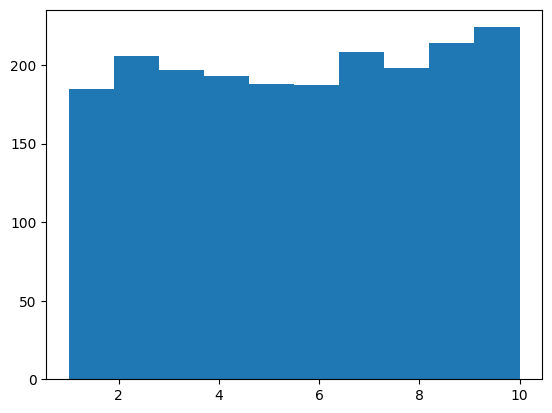

In [750]:
plt.hist(DF_test['Discount_offered']) 
plt.show()

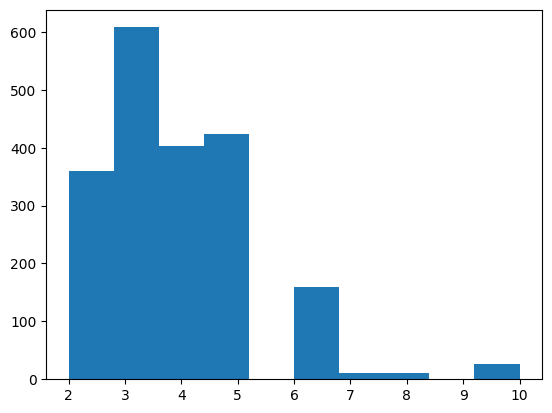

In [822]:
plt.hist(DF_test['Prior_purchases']) 
plt.show()

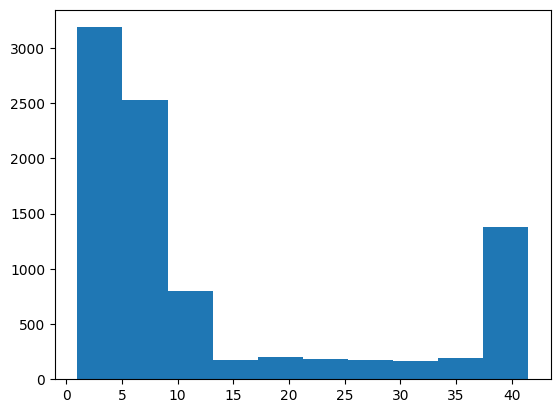

In [751]:
plt.hist(df_2['Discount_offered']) 
plt.show()

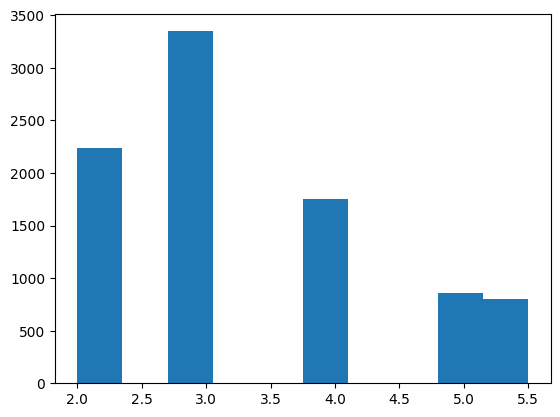

In [823]:
plt.hist(df_2['Prior_purchases']) 
plt.show()

 Observamos cómo quedó la distribución luego de escalar

vemos la distribucion de las variables

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10048\3176607019.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distdetails = sns.distplot(x = dfnum[variable], color = 'darkblue', ax=subplot,)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_10048\3176607019.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

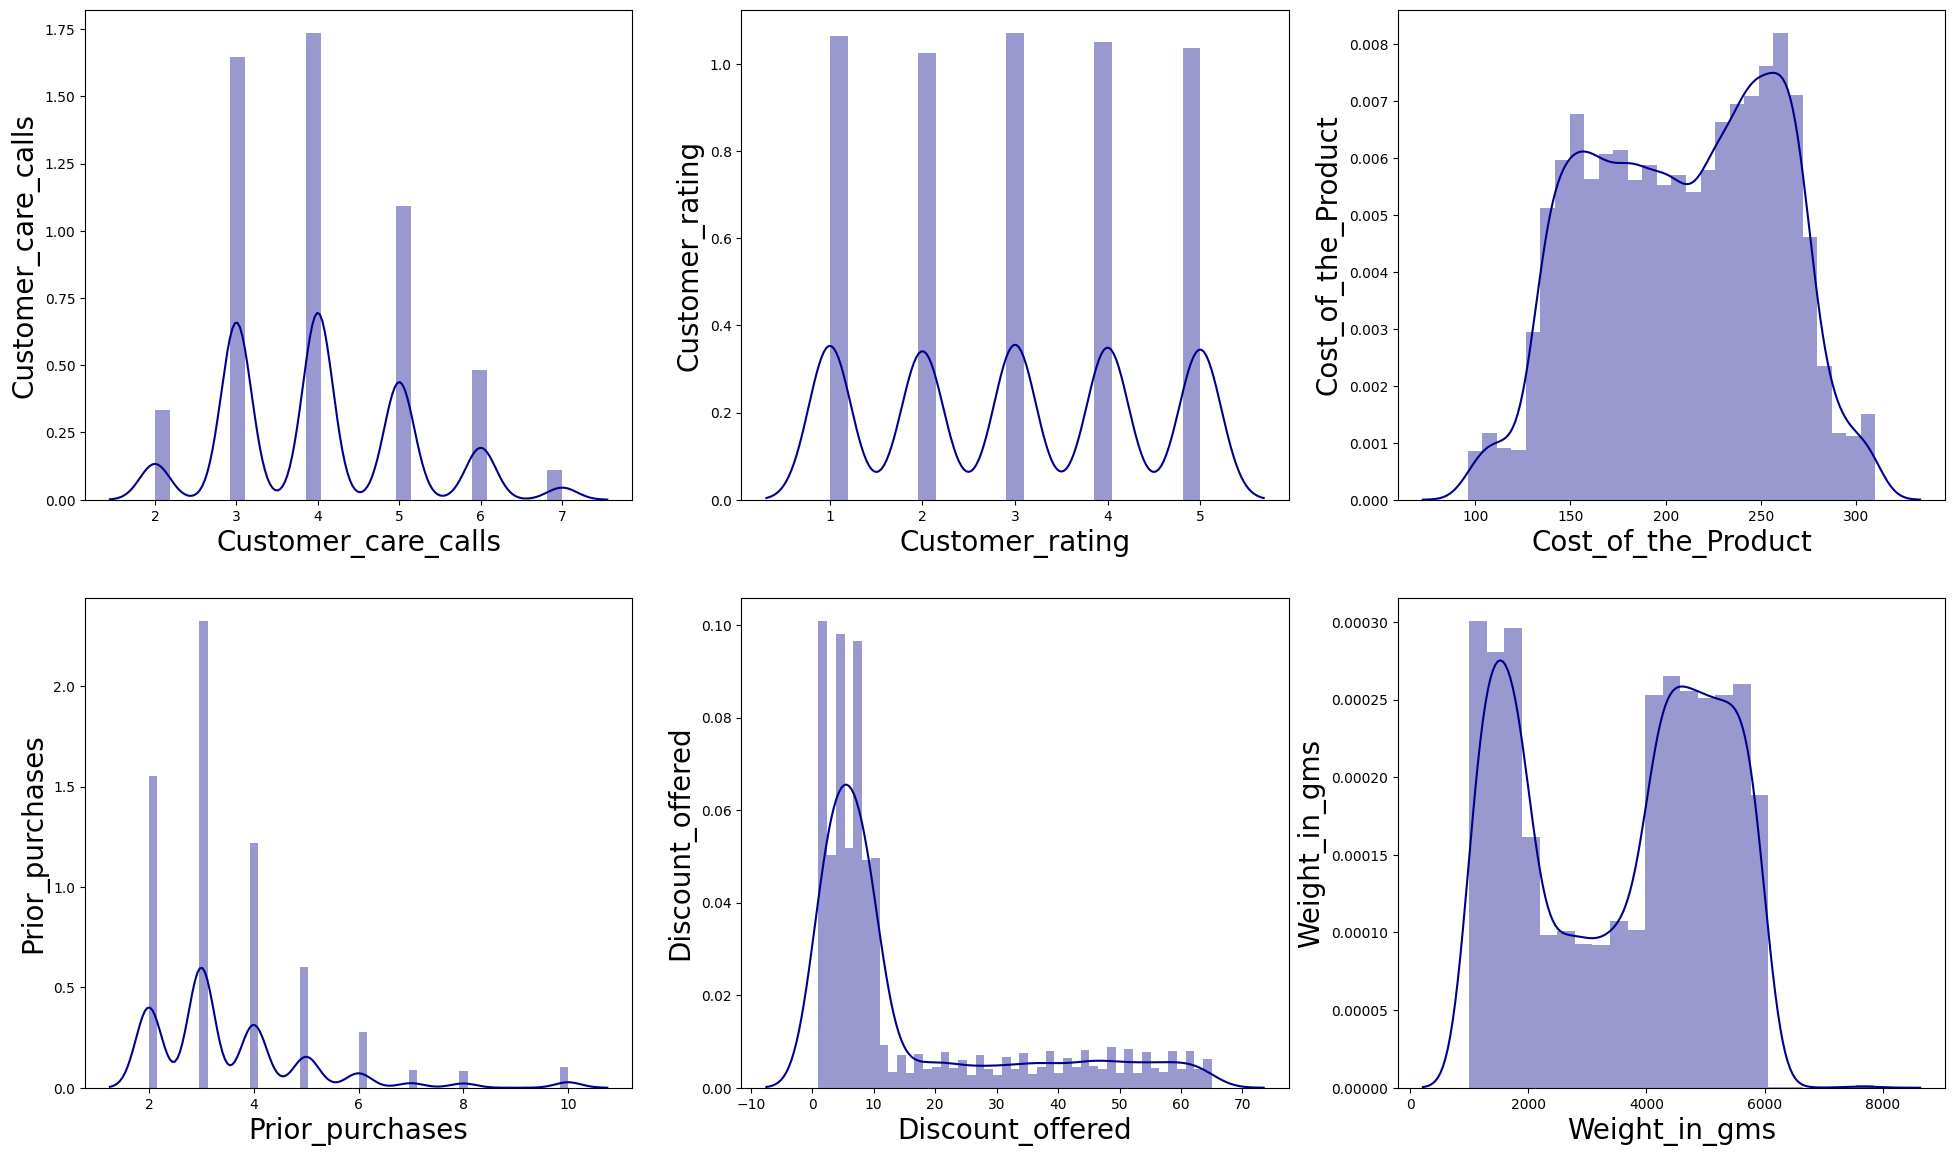

In [824]:
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(24,14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    distdetails = sns.distplot(x = dfnum[variable], color = 'darkblue', ax=subplot,) 
    distdetails.set_xlabel(variable, fontsize = 20)
    distdetails.set_ylabel(variable, fontsize = 20)
    
plt.show()

Como se puede ver en los diagramas de dispersión, se ve que existe la necesidad de escalar.

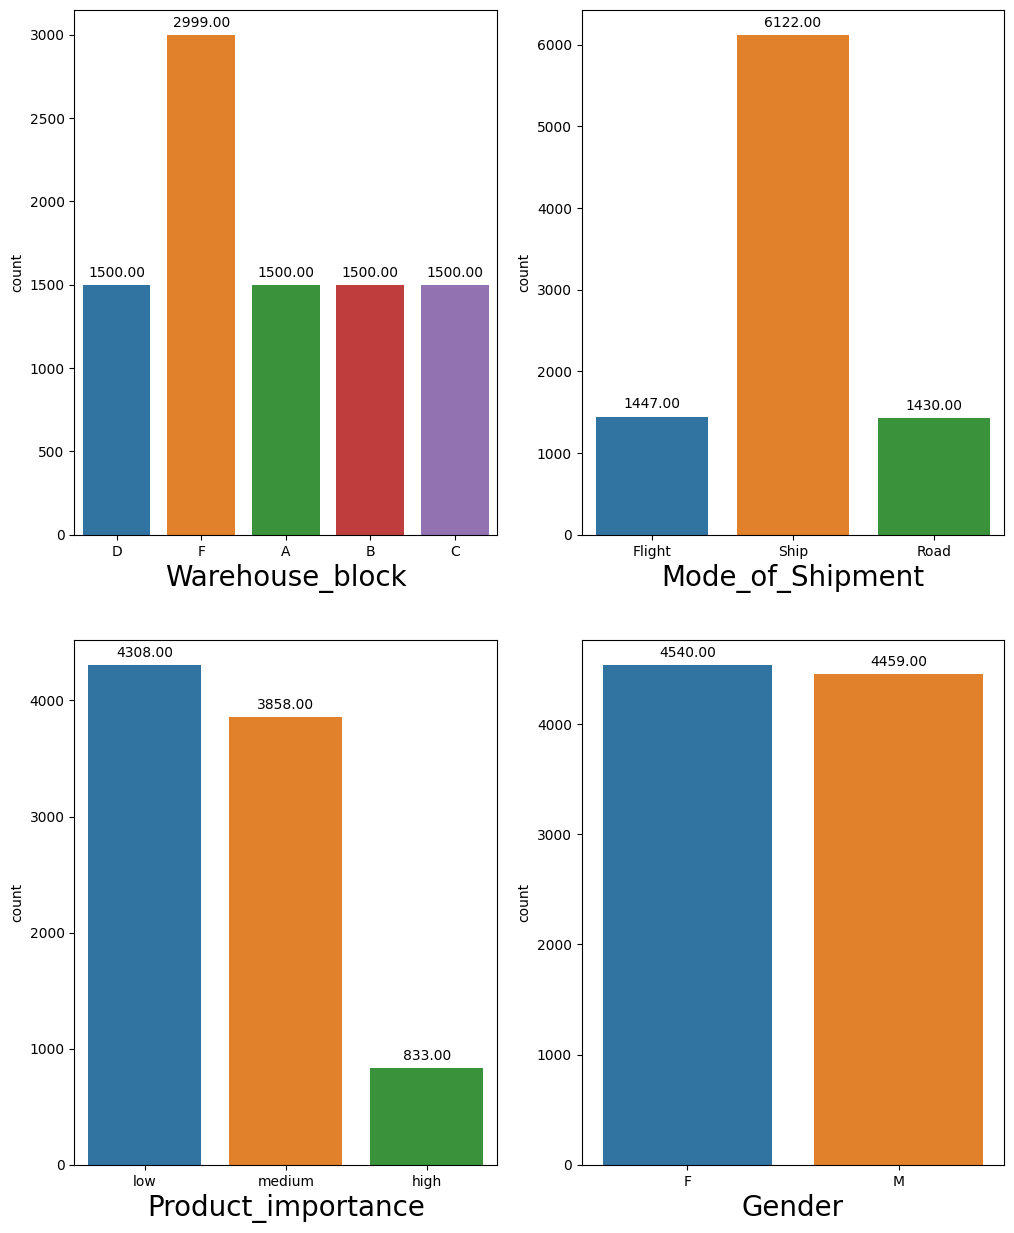

In [825]:
dfcategory = df_2.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value],ax=subplot, ) 
    plotting.set_xlabel(value, fontsize = 20)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

<AxesSubplot: >

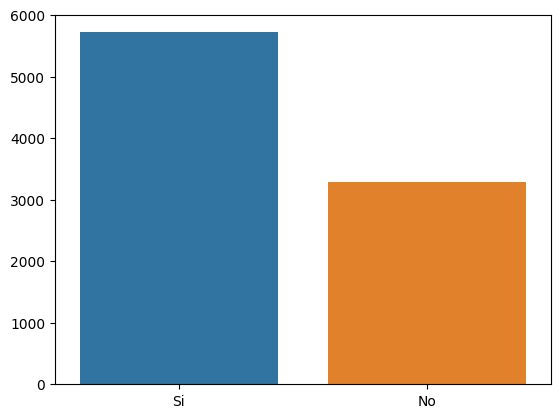

In [826]:
sns.barplot(x = df_2['shipping_status'].value_counts().index, y = df_2['shipping_status'].value_counts().values)

compararo genero y shipping_status con las variables Customer_care_call, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms,Discount

In [827]:
a = df_2.groupby(['Gender','shipping_status'])
df2 = df.set_index(["Gender", "shipping_status"])
ForGender = df2.groupby(level=df2.index.names.difference(["shipping_status"]))
ForGender.mean()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10048\378531557.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ForGender.mean()


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Gender,,,,,,
F,4.005286,2.994493,207.501542,3.364758,13.722687,3586.459912
M,4.025118,2.995515,209.640727,3.353891,13.339874,3582.231218


comomparo shipping_status , con el Warehouse, modo de envio y la importacia del producto.

In [828]:


def f(x):
    print(df_2.groupby([x,'shipping_status']).size().reset_index(name='count'), '\n', '\n')
f('Warehouse_block')
f('Mode_of_Shipment')


  Warehouse_block shipping_status  count
0               A              No    561
1               A              Si    939
2               B              No    536
3               B              Si    964
4               C              No    547
5               C              Si    953
6               D              No    541
7               D              Si    959
8               F              No   1095
9               F              Si   1904 
 

  Mode_of_Shipment shipping_status  count
0           Flight              No    513
1           Flight              Si    934
2             Road              No    547
3             Road              Si    883
4             Ship              No   2220
5             Ship              Si   3902 
 



In [757]:
f('Product_importance')
f('Gender')



  Product_importance shipping_status  count
0               high              No    279
1               high              Si    554
2                low              No   1586
3                low              Si   2722
4             medium              No   1415
5             medium              Si   2443 
 

  Gender shipping_status  count
0      F              No   1661
1      F              Si   2879
2      M              No   1619
3      M              Si   2840 
 



pearson: coficiente standar de correlacion

In [758]:
df_2.corr(method ='pearson')

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10048\942440962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2.corr(method ='pearson')


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Customer_care_calls,1.000000,0.012131,0.318109,0.164541,-0.133951,-0.237731
Customer_rating,0.012131,1.000000,0.009818,0.015606,-0.002428,-0.000227
Cost_of_the_Product,0.318109,0.009818,1.000000,0.100637,-0.145213,-0.057113
Prior_purchases,0.164541,0.015606,0.100637,1.000000,-0.075736,-0.113060
Discount_offered,-0.133951,-0.002428,-0.145213,-0.075736,1.000000,-0.436795
Weight_in_gms,-0.237731,-0.000227,-0.057113,-0.113060,-0.436795,1.000000


In [829]:
df_3 = df_2.copy()

In [830]:
df_3.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,shipping_status
0,D,Flight,4,2,177,3.0,low,F,41.5,1233,Si
1,F,Flight,4,5,216,2.0,low,M,41.5,3088,Si
2,A,Flight,2,2,183,4.0,low,M,41.5,3374,Si
3,B,Flight,3,3,176,4.0,medium,M,10.0,1177,Si
4,C,Flight,2,2,184,3.0,medium,F,41.5,2484,Si


cambio las categorias de (Customer_care_calls,Customer_rating,Prior_purchases) que eran obejetos para que pasen a categorias.

	Customer_care_calls	Customer_rating

In [831]:
DF_test_2 = DF_test.astype({"Customer_care_calls":"category","Customer_rating":"category", "Prior_purchases":"category"})

In [832]:
df_3 = df_3.astype({"Customer_care_calls":"category","Customer_rating":"category", "Prior_purchases":"category"})

In [833]:
DF_test.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
dtype: object

In [834]:
df_3.dtypes

Warehouse_block          object
Mode_of_Shipment         object
Customer_care_calls    category
Customer_rating        category
Cost_of_the_Product       int64
Prior_purchases        category
Product_importance       object
Gender                   object
Discount_offered        float64
Weight_in_gms             int64
shipping_status          object
dtype: object

La función get_dummies permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad (que una de las características sea una combinación lineal de las otras), lo que dificulta el correcto funcionamiento de los algoritmos.

In [835]:
df_3.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,shipping_status
0,D,Flight,4,2,177,3.0,low,F,41.5,1233,Si
1,F,Flight,4,5,216,2.0,low,M,41.5,3088,Si
2,A,Flight,2,2,183,4.0,low,M,41.5,3374,Si
3,B,Flight,3,3,176,4.0,medium,M,10.0,1177,Si
4,C,Flight,2,2,184,3.0,medium,F,41.5,2484,Si
5,F,Flight,3,1,162,3.0,medium,F,12.0,1417,Si
6,D,Flight,3,4,250,3.0,low,F,3.0,2371,Si
7,F,Flight,4,1,233,2.0,low,F,41.5,2804,Si
8,A,Flight,3,4,150,3.0,low,F,11.0,1861,Si
9,B,Flight,3,2,164,3.0,medium,F,29.0,1187,Si


In [836]:
DF_test.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,F,Ship,5,1,189,2,medium,M,10,5248
1,D,Ship,5,3,150,2,high,F,9,4446
2,F,Ship,3,3,200,3,low,M,3,5739
3,A,Ship,5,1,133,2,medium,M,1,4643
4,B,Ship,4,2,260,3,low,M,4,5504
5,C,Ship,4,2,195,2,medium,M,10,4640
6,F,Ship,4,3,245,4,medium,M,4,5940
7,D,Ship,6,3,166,4,low,M,10,5783
8,F,Ship,3,5,245,4,low,M,8,5600
9,A,Ship,6,2,130,5,low,M,3,5654


In [842]:
DF_test2 = pd.get_dummies(DF_test,drop_first = True)

In [841]:
df_3 = pd.get_dummies(df_2,drop_first = True)

gracias a la funcion anterior dejo de tener categoria y paso a tener columnas con datos binarios en los datos de Warehouse_block, Mode_of_Shipment,Product_importance, Gender, shipping_status ademas de perder la primera columna de cada una ya que con el resto se puede llegar a la misma informacion

In [843]:
DF_test2.head(10)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,5,1,189,2,10,5248,0,0,0,1,0,1,0,1,1
1,5,3,150,2,9,4446,0,0,1,0,0,1,0,0,0
2,3,3,200,3,3,5739,0,0,0,1,0,1,1,0,1
3,5,1,133,2,1,4643,0,0,0,0,0,1,0,1,1
4,4,2,260,3,4,5504,1,0,0,0,0,1,1,0,1
5,4,2,195,2,10,4640,0,1,0,0,0,1,0,1,1
6,4,3,245,4,4,5940,0,0,0,1,0,1,0,1,1
7,6,3,166,4,10,5783,0,0,1,0,0,1,1,0,1
8,3,5,245,4,8,5600,0,0,0,1,0,1,1,0,1
9,6,2,130,5,3,5654,0,0,0,0,0,1,1,0,1


In [844]:
df_3.head(10)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,shipping_status_Si
0,4,2,177,3.0,41.5,1233,0,0,1,0,0,0,1,0,0,1
1,4,5,216,2.0,41.5,3088,0,0,0,1,0,0,1,0,1,1
2,2,2,183,4.0,41.5,3374,0,0,0,0,0,0,1,0,1,1
3,3,3,176,4.0,10.0,1177,1,0,0,0,0,0,0,1,1,1
4,2,2,184,3.0,41.5,2484,0,1,0,0,0,0,0,1,0,1
5,3,1,162,3.0,12.0,1417,0,0,0,1,0,0,0,1,0,1
6,3,4,250,3.0,3.0,2371,0,0,1,0,0,0,1,0,0,1
7,4,1,233,2.0,41.5,2804,0,0,0,1,0,0,1,0,0,1
8,3,4,150,3.0,11.0,1861,0,0,0,0,0,0,1,0,0,1
9,3,2,164,3.0,29.0,1187,1,0,0,0,0,0,0,1,0,1



Escalado y normalización de las columnas Cost_of_the_Product, Discount_offered, Weight_in_gms

In [845]:
col = DF_test2[['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']]

In [846]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(col)
DF_test3 = pd.DataFrame(scaled_df, columns = col.columns)

In [847]:
col1 = df_3[['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']]

In [848]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(col1)
df_4 = pd.DataFrame(scaled_df, columns = col1.columns)



In [849]:
DF_test3.head(4)

,Cost_of_the_Product,Discount_offered,Weight_in_gms
0,-0.616410,1.510350,0.814459
1,-1.458294,1.165993,0.344728
2,-0.378956,-0.900149,1.102038
3,-1.825269,-1.588863,0.460111


In [850]:
df_4.head(4)

,Cost_of_the_Product,Discount_offered,Weight_in_gms
0,-0.653630,2.012839,-1.456259
1,0.154049,2.012839,-0.307411
2,-0.529372,2.012839,-0.130284
3,-0.674340,-0.254277,-1.490942


In [851]:
DF_test4 = DF_test2.drop(columns = col.columns) # all categorical columns

In [852]:
df_5 = df_3.drop(columns = col1.columns) # all categorical columns

In [853]:
DF_test5 = pd.concat([DF_test3, DF_test4], axis=1)

In [854]:


df_6 = pd.concat([df_4, df_5], axis=1)



este es el datasets que voy a sur para el modelo

In [855]:
DF_test5.head() 

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Customer_care_calls,Customer_rating,Prior_purchases,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.616410,1.510350,0.814459,5,1,2,0,0,0,1,0,1,0,1,1
1,-1.458294,1.165993,0.344728,5,3,2,0,0,1,0,0,1,0,0,0
2,-0.378956,-0.900149,1.102038,3,3,3,0,0,0,1,0,1,1,0,1
3,-1.825269,-1.588863,0.460111,5,1,2,0,0,0,0,0,1,0,1,1
4,0.916250,-0.555792,0.964399,4,2,3,1,0,0,0,0,1,1,0,1


In [783]:
df_6.head() 

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Customer_care_calls,Customer_rating,Prior_purchases,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,shipping_status_Si
0,-0.653630,2.012839,-1.456259,4,2,3,0,0,1,0,0,0,1,0,0,1
1,0.154049,2.012839,-0.307411,4,5,2,0,0,0,1,0,0,1,0,1,1
2,-0.529372,2.012839,-0.130284,2,2,4,0,0,0,0,0,0,1,0,1,1
3,-0.674340,-0.254277,-1.490942,3,3,4,1,0,0,0,0,0,0,1,1,1
4,-0.508662,2.012839,-0.681484,2,2,3,0,1,0,0,0,0,0,1,0,1


In [861]:


df_model = df_6.drop(columns = ['shipping_status_Si'])
df_model['shipping_status_Si'] = df_6['shipping_status_Si']



In [862]:
df_model['shipping_status_Si'].value_counts()

1    5719
0    3280
Name: shipping_status_Si, dtype: int64

In [863]:


df_model.head()



,Cost_of_the_Product,Discount_offered,Weight_in_gms,Customer_care_calls,Customer_rating,Prior_purchases,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M,shipping_status_Si
0,-0.653630,2.012839,-1.456259,4,2,3.0,0,0,1,0,0,0,1,0,0,1
1,0.154049,2.012839,-0.307411,4,5,2.0,0,0,0,1,0,0,1,0,1,1
2,-0.529372,2.012839,-0.130284,2,2,4.0,0,0,0,0,0,0,1,0,1,1
3,-0.674340,-0.254277,-1.490942,3,3,4.0,1,0,0,0,0,0,0,1,1,1
4,-0.508662,2.012839,-0.681484,2,2,3.0,0,1,0,0,0,0,0,1,0,1


In [865]:


from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *

pruevo si cambia la prediccion eliminando las columnas menos importantes


In [789]:
#m=df_model.drop(['Gender_M','Product_importance_medium','Product_importance_low','Mode_of_Shipment_Ship','Mode_of_Shipment_Road','Warehouse_block_F','Warehouse_block_D','Warehouse_block_C','Warehouse_block_B'] ,axis = 1)
#x1 = m.drop(['shipping_status_Si'] ,axis = 1)
#y1 = m['shipping_status_Si']


In [866]:
x1 = df_model.drop(['shipping_status_Si'] ,axis = 1)
y1 = df_model['shipping_status_Si']

In [867]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)


X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

model =  RandomForestClassifier(random_state = 42)
model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

Importacia tiene cada columna con la legada a tiempo del envio

<AxesSubplot: xlabel='important', ylabel='features'>

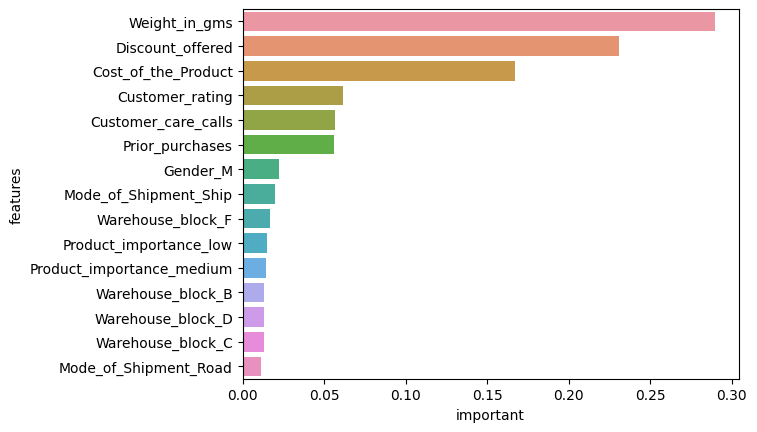

In [868]:
important_features = pd.DataFrame({'features': X_train1.columns, 
                                   'important': model.feature_importances_})
important_features = important_features.sort_values('important', ascending = False)

sns.barplot(x = 'important', y = 'features', data = important_features)

In [869]:
X = x1
y = y1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

escoguiendo el mejor parametro para el modelo

In [870]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result



In [795]:
gs_rf = RandomForestClassifier(random_state = 0)
rf_params = {
 'n_estimators':[200,500],
 'criterion': ('gini','entropy'),
 'max_depth': [2, 3 ,4, 5, 6, 7, 8],
 'min_samples_split': [2, 9],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

c:\Users\Administrador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 9, 'n_estimators': 500}


In [796]:


gs_knn = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
print('Best parameters for KNN: ', gridsearch(gs_knn , knn_params))



Best parameters for KNN:  {'n_neighbors': 11}


In [797]:
gs_adb = AdaBoostClassifier(random_state = 0)
adb_params ={
    'n_estimators':[10, 50, 100, 250, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]}
print(f'Best parameters for AdaBoost: ', gridsearch(gs_adb , adb_params))

Best parameters for AdaBoost:  {'learning_rate': 1, 'n_estimators': 10}


In [798]:
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[100,300],
              'learning_rate':[0.1,0.2]} 
print(f'Best parameters for XGBoost: ', gridsearch(xgb_gs , xgb_params))

Best parameters for XGBoost:  {'learning_rate': 0.1, 'n_estimators': 100}


construcion de modelo 

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 9, 'n_estimators': 200}

In [871]:
lr  = LogisticRegression(random_state=0, penalty = 'l2')
knn = KNeighborsClassifier(n_neighbors= 11)
rf  = RandomForestClassifier(max_depth=8, random_state=0 , criterion= 'gini' , max_features='auto' , min_samples_split= 9 , n_estimators= 500)
adb  = AdaBoostClassifier(n_estimators=10, learning_rate = 1, random_state=0)
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.1 , n_estimators= 100)



Metricas del modelo

In [872]:
def creport(model):
    ypred = model.predict(X_test)
    return classification_report(y_test, ypred)

In [873]:
def accuracy(y_test , ypred):
    return accuracy_score(y_test , ypred)

In [874]:
def f1(y_test , ypred):
    return f1_score(y_test, ypred, average='macro')

In [875]:
random_forest = rf
random_forest.fit(X_train,y_train)
print(creport(random_forest))

c:\Users\Administrador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.53      0.85      0.66       617
           1       0.89      0.61      0.73      1183

    accuracy                           0.69      1800
   macro avg       0.71      0.73      0.69      1800
weighted avg       0.77      0.69      0.70      1800



In [876]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           0       0.51      0.63      0.57       617
           1       0.78      0.69      0.73      1183

    accuracy                           0.67      1800
   macro avg       0.65      0.66      0.65      1800
weighted avg       0.69      0.67      0.68      1800



In [805]:
logistic_regression = lr
logistic_regression.fit(X_train,y_train)
print(creport(logistic_regression))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53       617
           1       0.76      0.72      0.74      1183

    accuracy                           0.66      1800
   macro avg       0.63      0.64      0.63      1800
weighted avg       0.67      0.66      0.66      1800



In [877]:
ADA = adb
ADA.fit(X_train , y_train)
print(creport(ADA))

              precision    recall  f1-score   support

           0       0.53      0.87      0.66       617
           1       0.90      0.59      0.71      1183

    accuracy                           0.69      1800
   macro avg       0.71      0.73      0.69      1800
weighted avg       0.77      0.69      0.69      1800



In [878]:
XGB = xgb
XGB.fit(X_train , y_train)
print(creport(XGB))

              precision    recall  f1-score   support

           0       0.53      0.77      0.63       617
           1       0.84      0.64      0.73      1183

    accuracy                           0.69      1800
   macro avg       0.69      0.71      0.68      1800
weighted avg       0.73      0.69      0.69      1800



evaluacion de modelos de precdiccion

In [879]:
y_train_pred_rf = random_forest.predict(X_train)
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_lr = logistic_regression.predict(X_train)
y_train_pred_ada = ADA.predict(X_train)
y_train_pred_xgb = XGB.predict(X_train)

In [880]:
y_test_pred_rf = random_forest.predict(X_test)
y_test_pred_knn = KNN.predict(X_test)
y_test_pred_lr = logistic_regression.predict(X_test)
y_test_pred_ada = ADA.predict(X_test)
y_test_pred_xgb = XGB.predict(X_test)

In [883]:
all_evaluate = pd.DataFrame({'Model':['Random Forest', 'KNN', 'Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Train Accuracy':[accuracy(y_train,y_train_pred_rf), accuracy(y_train,y_train_pred_knn), accuracy(y_train,y_train_pred_lr),
                     accuracy(y_train,y_train_pred_ada), accuracy(y_train,y_train_pred_xgb)],
    'Test Accuracy':[accuracy(y_test,y_test_pred_rf), accuracy(y_test,y_test_pred_knn), accuracy(y_test,y_test_pred_lr),
                     accuracy(y_test,y_test_pred_ada), accuracy(y_test,y_test_pred_xgb)],
                                      
    'f1-score':[f1(y_test,y_test_pred_rf), f1(y_test,y_test_pred_knn), f1(y_test,y_test_pred_lr),
                     f1(y_test,y_test_pred_ada), f1(y_test,y_test_pred_xgb)]}
                     )

print(all_evaluate)



                 Model  Train Accuracy  Test Accuracy  f1-score
0        Random Forest        0.776080       0.695000  0.691226
1                  KNN        0.753994       0.669444  0.649928
2  Logistic Regression        0.675372       0.661111  0.631531
3             AdaBoost        0.717600       0.687778  0.685164
4              XGBoost        0.839144       0.686111  0.677806


In [884]:
y_pred = xgb.predict(DF_test5)
file = pd.DataFrame(y_pred, columns = ['pred'])
file.to_csv('benjaminpast.csv', index = False)

In [ ]:
#y_pred = rf.predict(DF_test5)
#file = pd.DataFrame(y_pred, columns = ['pred'])
#file.to_csv('benjaminpast.csv', index = False)